<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The Commissioner of the New York State Education Department would like to understand how the state fares in its education outcomes as measured by SAT/ACT scores, and if the state should increase its public school system spending in order to improve students' performance in the examinations. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

I used 2 datasets for this exercise:
* 2019 ACT Scores by State  
* 2019 SAT Scores by State

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

I used 3 external datasets: 

* FY2018 Public Elementary-Secondary Education Finance data extracted from Census.gov. See summary tables from
https://www.census.gov/data/tables/2018/econ/school-finances/secondary-education-finance.html

* 2019 State GDP data extracted from U.S. Bureau of Economic Analysis. See
https://apps.bea.gov/regional/histdata/releases/0420gdpstate/index.cfm

* 2019 State Per Capita Personal Income data extracted from U.S. Bureau of Economic Analysis. See
https://apps.bea.gov/regional/histdata/releases/0320spi/index.cfm

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [328]:
# Using population mean equation
def calc_mean(series):
    mean = sum(series) / series.count()
    return mean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [329]:
# Using population standard deviation equation
def calc_stdev(series):
    return (sum([(i-calc_mean(series))**2 for i in series]) / series.count())**(1/2)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [330]:
def percent_to_dec(string):
    return float(string.replace('%',('')))/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [332]:
# Loading and cleaning SAT data
sat2019 = pd.read_csv("../data/sat_2019.csv")
# Drop Puerto Rico and Virgin Islands
index_values = sat2019[[i in ['Puerto Rico', 'Virgin Islands'] for i in sat2019['State']]].index.values
sat2019.drop(index=index_values, inplace=True)
# Convert Participation Rate from str to float
sat2019['Participation Rate'] = sat2019['Participation Rate'].apply(percent_to_dec)

In [333]:
# Loading and cleaning ACT data
act2019 = pd.read_csv("../data/act_2019.csv")
# Converting participation from percent to float
act2019['Participation'] = act2019['Participation'].apply(percent_to_dec)

In [334]:
# Loading and cleaning state expenditure on education data
expnd = pd.read_csv("../data/Ed_spending_by_state.csv")
# Drop rows with null values
expnd.dropna(inplace=True, how='all')
# Convert spending from str to float
def str_to_int(string):
    return float(string.replace(',',''))
expnd['Ed_spending_FY2018_thousands'] = expnd['Ed_spending_FY2018_thousands'].apply(str_to_int)

In [335]:
# Loading and cleaning GDP data
gdp = pd.read_csv('../data/SAGDP1__ALL_AREAS_1997_2019.csv')
# Extract 2019 Current GDP data by State
gdp2019 = gdp.loc[gdp['LineCode']==3, ['GeoName', '2019']]
# Normalize GDP from millions to thousands
gdp2019['2019'] = gdp2019['2019'] * 1_000
# Rename GeoName column
gdp2019.rename(columns = {'GeoName':'State'}, inplace=True)

In [336]:
# Loading and cleaning PI data
pi = pd.read_csv('../data/SAINC1__ALL_AREAS_1929_2019.csv')
# Extract 2019 PI data by State
pi2019 = pi.loc[pi['LineCode']==3, ['GeoName','2019']]
# Replacing values
pi2019.loc[8, 'GeoName'] = 'Alaska'
pi2019.loc[38, 'GeoName'] = 'Hawaii'
# Rename GeoName column
pi2019.rename(columns = {'GeoName':'State'}, inplace=True)

In [337]:
# Merging SAT and ACT data
score = pd.merge(sat2019, act2019, how='inner', on='State')

In [338]:
# Merging expenditure and GDP data
expndgdp = pd.merge(expnd, gdp2019, how='inner', on='State')

In [339]:
# Merging expenditure and PI data
expndPI = pd.merge(expndgdp, pi2019, how='inner', on='State')

In [340]:
# Merging final dataset
score2019 = pd.merge(score, expndPI, how='inner', on='State')

In [341]:
score2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total', 'Participation',
       'Composite', 'Ed_spending_FY2018_thousands', '2019_x', '2019_y'],
      dtype='object')

In [342]:
# Renaming columns
new_columns_dict = {
    'State' : 'state',
    'Participation Rate' : 'sat_participate', 
    'EBRW' : 'sat_ebrw', 
    'Math' : 'sat_math', 
    'Total' : 'sat_score', 
    'Participation' : 'act_participate', 
    'Composite' : 'act_score', 
    'Ed_spending_FY2018_thousands' : 'eduspend', 
    '2019_x' : 'gdp2019',
    '2019_y' : 'pci2019'
}
score2019.rename(columns = new_columns_dict, inplace=True)

In [343]:
# Add new column normeduspend - eduspend as a % of GDP
score2019['normeduspend'] = round(score2019['eduspend'] / score2019['gdp2019'] * 100, 2)

In [344]:
score2019.head()

,state,sat_participate,sat_ebrw,sat_math,sat_score,act_participate,act_score,eduspend,gdp2019,pci2019,normeduspend
0,Alabama,0.07,583,560,1143,1.00,18.9,7327918.0,2.281426e+08,43880.0,3.21
1,Alaska,0.41,556,541,1097,0.38,20.1,2362970.0,5.438560e+07,62102.0,4.34
2,Arizona,0.31,569,565,1134,0.73,19.0,7713512.0,3.701191e+08,46233.0,2.08
3,Arkansas,0.06,582,559,1141,1.00,19.3,4899604.0,1.309541e+08,44845.0,3.74
4,California,0.63,534,531,1065,0.23,22.6,79023632.0,3.132801e+09,66661.0,2.52


In [345]:
# Saving data
score2019.to_csv("../data/score2019.csv", index=False)

In [7]:
score2019 = pd.read_csv("../data/score2019.csv")
score2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            51 non-null     object 
 1   sat_participate  51 non-null     float64
 2   sat_ebrw         51 non-null     int64  
 3   sat_math         51 non-null     int64  
 4   sat_score        51 non-null     int64  
 5   act_participate  51 non-null     float64
 6   act_score        51 non-null     float64
 7   eduspend         51 non-null     float64
 8   gdp2019          51 non-null     float64
 9   pci2019          51 non-null     float64
 10  normeduspend     51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.5+ KB


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

### Data Dictionary for score2019.csv
___

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|The name of the US state| 
|sat_participate|float|SAT|The participation rate of students in the state taking the SAT as a decimal|
|sat_ebrw|integer|SAT|The mean score of students in the state on the Evidence-Based Reading & Writing section of the SAT|
|sat_math|integer|SAT|The mean score of students in the state on the Math section of the SAT|
|sat_score|integer|SAT|The mean score of students in the state on the SAT|
|act_participate|float|ACT|The participation rate of students in the state taking the ACT as a decimal|
|act_score|float|ACT|The mean score of students in the state on the ACT|
|eduspend|float|2018 Public Elementary-Secondary Education Finance Data|The amount of state public school system spending in FY2018 in thousands of dollars|
|gdp2019|float|Gross Domestic Product by State, Fourth Quarter and Annual 2019|State Gross Domestic Product in 2019 in thousands of 2019 dollars|
|pci2019|float|State Personal Income: Preliminary estimates for 2019|Per Capita Personal Income by State in dollars 
|normeduspend|float|NA|State public school system spending in FY2018 as a percentage of state GDP



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [347]:
# Summary statistics
score2019.describe()

,sat_participate,sat_ebrw,sat_math,sat_score,act_participate,act_score,eduspend,gdp2019,pci2019,normeduspend
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706,1.236140e+07,4.179124e+08,55088.411765,3.059608
std,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523,1.563051e+07,5.458055e+08,9675.347422,0.661773
min,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000,1.175381e+06,3.401340e+07,39368.000000,0.820000
25%,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000,2.982548e+06,1.004438e+08,48297.000000,2.655000
50%,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000,7.399923e+06,2.475438e+08,52937.000000,3.000000
75%,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000,1.406792e+07,5.468968e+08,59899.500000,3.535000
max,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000,7.902363e+07,3.132801e+09,84538.000000,4.560000


In [348]:
# Generating the standard deviation
sd = {i : round(calc_stdev(score2019[i]),2) for i in score2019 if i not in ['state', 'statecode', 'act_participate_q', 'sat_participate_q']}
sd

{'sat_participate': 0.38,
 'sat_ebrw': 45.79,
 'sat_math': 50.79,
 'sat_score': 96.24,
 'act_participate': 0.34,
 'act_score': 2.17,
 'eduspend': 15476515.06,
 'gdp2019': 540427982.18,
 'pci2019': 9580.02,
 'normeduspend': 0.66}

In [349]:
# New York's values
score2019.loc[score2019['state']=='New York']

,state,sat_participate,sat_ebrw,sat_math,sat_score,act_participate,act_score,eduspend,gdp2019,pci2019,normeduspend
32,New York,0.79,531,533,1064,0.22,24.5,66172625.0,1.772261e+09,71440.0,3.73


In [8]:
# Example of sorting - where does New York stand amongst other states in terms of mean SAT and ACT score?
sat_sort = score2019.sort_values('sat_score', ascending=False).reset_index()
act_sort = score2019.sort_values('act_score', ascending=False).reset_index()
 
sat_rank = sat_sort.loc[sat_sort['state']=='New York'].index.values
act_rank = act_sort.loc[act_sort['state']=='New York'].index.values
print(sat_rank, act_rank)

# New York is ranked 34th highest in mean SAT score and 5th highest in mean ACT score out of 51 jurisdictions.

[33] [4]


In [11]:
# Where does New York stand based on per capita income?
pci_sort = score2019.sort_values('pci2019', ascending=False).reset_index()

pci_rank = pci_sort.loc[pci_sort['state']=='New York'].index.values
print(pci_rank)

# New York is ranked 4th highest based on per capita income out of 51 jurisdictions.

[3]


In [351]:
# Example of filtering - which states have higher normalised public school system spending than New York?
score2019[(score2019['normeduspend']>3.73)]
# 8 states have higher normalised education spending. 

,state,sat_participate,sat_ebrw,sat_math,sat_score,act_participate,act_score,eduspend,gdp2019,pci2019,normeduspend
1,Alaska,0.41,556,541,1097,0.38,20.1,2362970.0,54385600.0,62102.0,4.34
3,Arkansas,0.06,582,559,1141,1.00,19.3,4899604.0,130954100.0,44845.0,3.74
19,Maine,0.99,512,502,1013,0.06,24.3,2645498.0,67717100.0,50950.0,3.91
30,New Jersey,0.82,544,545,1090,0.25,24.2,28929684.0,634783600.0,70979.0,4.56
39,Rhode Island,1.00,503,492,995,0.12,24.7,2337880.0,61883800.0,56542.0,3.78
45,Vermont,0.66,560,546,1106,0.20,24.1,1506357.0,34013400.0,56691.0,4.43
48,West Virginia,0.99,483,460,943,0.49,20.8,3128251.0,78863900.0,42336.0,3.97
50,Wyoming,0.03,623,615,1238,1.00,19.8,1524442.0,40420100.0,63316.0,3.77


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [352]:
# Setting up new column with US State two letter codes
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
score2019['statecode'] = score2019['state'].map(us_state_abbrev)

In [432]:
fig = go.Figure(data=go.Choropleth(
    locations=score2019['statecode'], # Spatial coordinates
    z = score2019['sat_participate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Participation Rate",
))

fig.update_layout(
    title_text = '2019 SAT Participation Rate by State',
    geo_scope='usa', # limit map scope to USA
    autosize=False,
    width=600,
    height=300,
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=50,
        pad = 4
    )
)

fig.add_trace(go.Choropleth(
        locationmode='USA-states',
        z=[0],
        locations=['NY'],
        colorscale = [[0,'rgba(0, 0, 0, 0)'],[1,'rgba(0, 0, 0, 0)']],
        marker_line_color='Red',
        marker_line_width=3,
        showscale = False,
    )
)

fig.show()
# Like other states in the Northeastern Seaboard, New York state has high SAT participation rates. 

In [417]:
fig = go.Figure(data=go.Choropleth(
    locations=score2019['statecode'], # Spatial coordinates
    z = score2019['act_participate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Participation Rate",
))

fig.update_layout(
    title_text = '2019 ACT Participation Rate by State',
    geo_scope='usa', # limit map scope to USA
    autosize=False,
    width=600,
    height=300,
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=50,
        pad = 4
    )
)

fig.add_trace(go.Choropleth(
        locationmode='USA-states',
        z=[0],
        locations=['NY'],
        colorscale = [[0,'rgba(0, 0, 0, 0)'],[1,'rgba(0, 0, 0, 0)']],
        marker_line_color='Red',
        marker_line_width=3,
        showscale = False,
    )
)

fig.show()
# In contrast, the ACT participation rates are higher for states in the mid-west and south. 

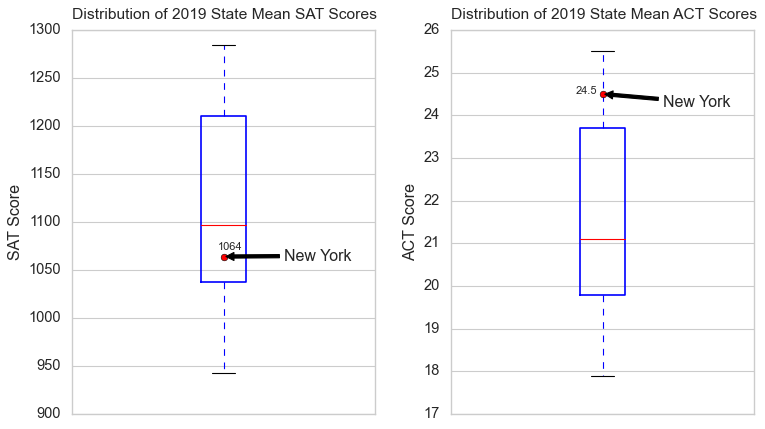

In [419]:
from matplotlib import style
style.use('seaborn-whitegrid')

plt.rcParams['boxplot.boxprops.linewidth'] = 1.5
plt.rcParams['boxplot.medianprops.color'] = 'r'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.family'] = 'Arial'

sns.set_context('notebook', font_scale=1.2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
ax[0].boxplot(score2019['sat_score'])
ax[1].boxplot(score2019['act_score'])
ax[0].plot(1, score2019.loc[score2019['state']=='New York',['sat_score']].values, marker='o', color='red')
ax[1].plot(1, score2019.loc[score2019['state']=='New York',['act_score']].values, marker='o', color='red')

ax[0].set_title('Distribution of 2019 State Mean SAT Scores', loc='left', fontsize=14, pad=10)
ax[1].set_title('Distribution of 2019 State Mean ACT Scores', loc='left', fontsize=14, pad=10)

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_ylabel('SAT Score')
ax[1].set_ylabel('ACT Score')

ax[0].annotate('New York', xy=(1, score2019.loc[score2019['state']=='New York',['sat_score']].values), xytext=(1.2, 1060), arrowprops=dict(arrowstyle='simple', color='k'))
ax[1].annotate('New York', xy=(1, score2019.loc[score2019['state']=='New York',['act_score']].values), xytext=(1.2, 24.2), arrowprops=dict(arrowstyle='simple', color='k'))
ax[0].annotate('1064', xy=(0.98,1071), fontsize=10)
ax[1].annotate('24.5', xy=(0.91,24.5), fontsize=10)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)

plt.show()
#plt.savefig('score_dist.png', bbox_inches='tight')

# New York state fares below average on mean SAT score, but lies above the 75th percentile for mean ACT score. 

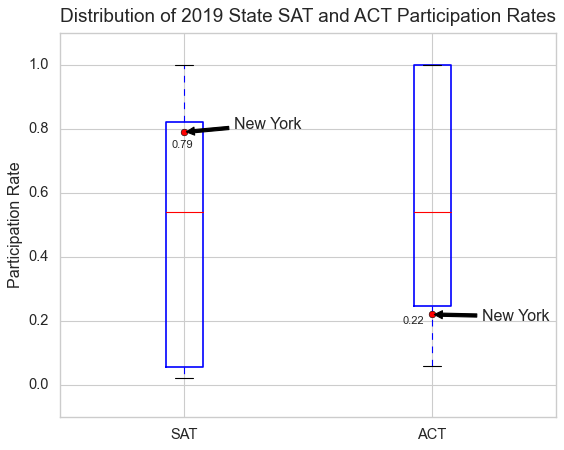

In [434]:
fig, ax = plt.subplots(figsize=(8, 6))
score2019.boxplot(['sat_participate', 'act_participate'], ax=ax)

plt.xticks([1,2], ['SAT', 'ACT'])
plt.ylim([-0.1, 1.1])

ax.plot(1, score2019.loc[score2019['state']=='New York',['sat_participate']].values, marker='o', color='red')
ax.plot(2, score2019.loc[score2019['state']=='New York',['act_participate']].values, marker='o', color='red')

ax.set_title('Distribution of 2019 State SAT and ACT Participation Rates', loc='left', fontsize=17, pad=10)
ax.set_ylabel('Participation Rate')

ax.annotate('New York', xy=(1, score2019.loc[score2019['state']=='New York',['sat_participate']].values), xytext=(1.2, 0.8), arrowprops=dict(arrowstyle='simple', color='k'))
ax.annotate('New York', xy=(2, score2019.loc[score2019['state']=='New York',['act_participate']].values), xytext=(2.2, 0.2), arrowprops=dict(arrowstyle='simple', color='k'))

ax.annotate('0.79', xy=(0.95,0.74), fontsize=10)
ax.annotate('0.22', xy=(1.88,0.19), fontsize=10)

plt.show()
# plt.savefig('part_dist.png', bbox_inches='tight')

# In contrast, New York state has high SAT (3rd quartile) but low ACT participation rates (1st quartile), inversely correlated with its performance in the examinations.

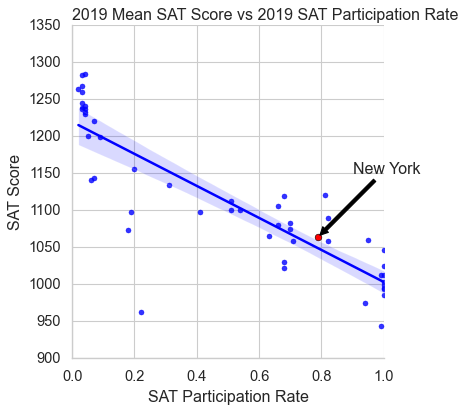

In [435]:
a = sns.lmplot(x='sat_participate', y='sat_score', data=score2019, fit_reg=True, legend=False)
a = (a.set_axis_labels('SAT Participation Rate','SAT Score'))

plt.plot(score2019.loc[score2019['state']=='New York',['sat_participate']].values, score2019.loc[score2019['state']=='New York',['sat_score']].values, marker='o', color='red')

plt.annotate('New York', xy=(score2019.loc[score2019['state']=='New York',['sat_participate']].values, score2019.loc[score2019['state']=='New York',['sat_score']].values), xytext=(0.9, 1150), arrowprops=dict(arrowstyle='simple', color='k'))

plt.title('2019 Mean SAT Score vs 2019 SAT Participation Rate', loc='left')
plt.show()
# plt.savefig('satscore_vs_satpart.png', bbox_inches='tight')

# There is a clear negative correlation between score and participation rate. 
# New York's mean SAT scores are above the expectation based on its SAT participation rate. 

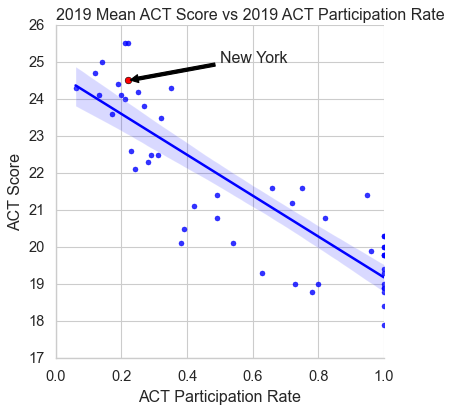

In [436]:
a = sns.lmplot(x='act_participate', y='act_score', data=score2019, fit_reg=True, legend=False)
a = (a.set_axis_labels('ACT Participation Rate','ACT Score'))

plt.plot(score2019.loc[score2019['state']=='New York',['act_participate']].values, score2019.loc[score2019['state']=='New York',['act_score']].values, marker='o', color='red')

plt.annotate('New York', xy=(score2019.loc[score2019['state']=='New York',['act_participate']].values, score2019.loc[score2019['state']=='New York',['act_score']].values), xytext=(0.5, 25), arrowprops=dict(arrowstyle='simple', color='k'))

plt.title('2019 Mean ACT Score vs 2019 ACT Participation Rate', loc='left')
plt.show()
# plt.savefig('actscore_vs_actpart.png', bbox_inches='tight')

# New York's mean ACT scores are above the expectation based on its ACT participation rate. 

In [357]:
# Generating column grouping for SAT participation rate
satp_quantile = score2019['sat_participate'].quantile([0.25, 0.5, 0.75])
def set_satp_quantile(i):
    if i < satp_quantile[0.25]: 
        return '1st_q'
    elif i < satp_quantile[0.5]:
        return '2nd_q'
    elif i < satp_quantile[0.75]:
        return '3rd_q'
    else:
        return '4th_q'

score2019['sat_participate_q'] = score2019['sat_participate'].apply(set_satp_quantile)

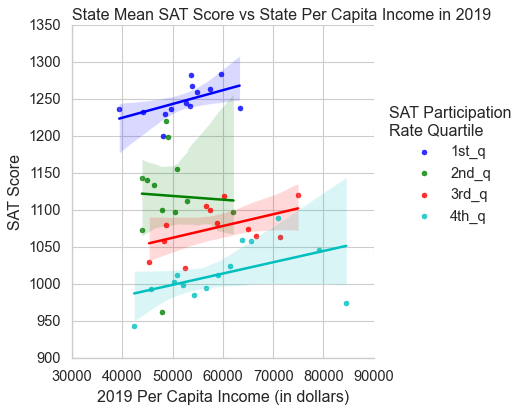

In [437]:
sns.set_style("whitegrid")
a = sns.lmplot(x='pci2019', y='sat_score', data=score2019, hue='sat_participate_q', hue_order=['1st_q', '2nd_q', '3rd_q', '4th_q'], fit_reg=True, legend=False)
a = (a.set_axis_labels('2019 Per Capita Income (in dollars)','SAT Score'))

plt.legend(title='SAT Participation\nRate Quartile', bbox_to_anchor=(1.5,0.8))
plt.title('State Mean SAT Score vs State Per Capita Income in 2019', loc='left')
plt.show()
# plt.savefig('satscore_vs_pci.png', bbox_inches='tight')

# Mean SAT score seems to be somewhat correlated with per capita income.

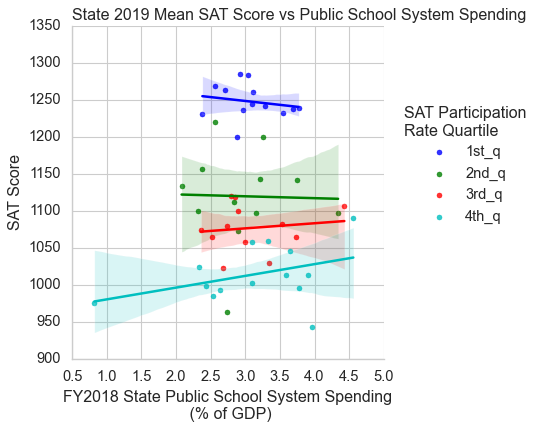

In [438]:
a = sns.lmplot(x='normeduspend', y='sat_score', data=score2019, hue='sat_participate_q', hue_order=['1st_q', '2nd_q', '3rd_q', '4th_q'], fit_reg=True, legend=False)
a = (a.set_axis_labels('FY2018 State Public School System Spending\n (% of GDP)','SAT Score'))

plt.legend(title='SAT Participation\nRate Quartile', bbox_to_anchor=(1.5,0.8))
plt.title('State 2019 Mean SAT Score vs Public School System Spending', loc='left')
plt.show()
# plt.savefig('satscore_vs_eduspend.png', bbox_inches='tight')

# On the other hand, normalised public school system spending does not seem to be correlated with mean SAT score. 

In [360]:
# Generating column grouping for ACT participation rate
actp_quantile = score2019['act_participate'].quantile([0.25, 0.5, 0.75])
def set_actp_quantile(i):
    if i < actp_quantile[0.25]: 
        return '1st_q'
    elif i < actp_quantile[0.5]:
        return '2nd_q'
    elif i < actp_quantile[0.75]:
        return '3rd_q'
    else:
        return '4th_q'

score2019['act_participate_q'] = score2019['act_participate'].apply(set_actp_quantile)

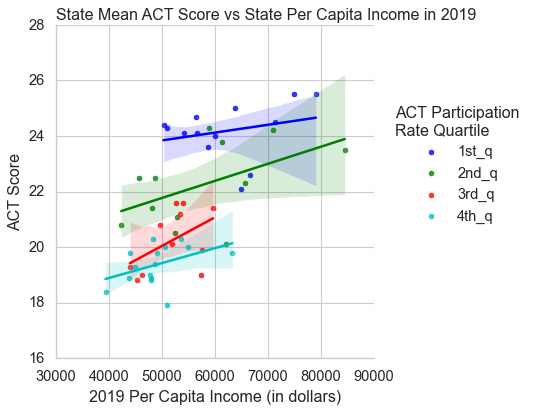

In [439]:
a = sns.lmplot(x='pci2019', y='act_score', data=score2019, hue='act_participate_q', hue_order=['1st_q', '2nd_q', '3rd_q', '4th_q'], fit_reg=True, legend=False)
a = (a.set_axis_labels('2019 Per Capita Income (in dollars)','ACT Score'))

plt.legend(title='ACT Participation\nRate Quartile', bbox_to_anchor=(1.5,0.8))
plt.title('State Mean ACT Score vs State Per Capita Income in 2019', loc='left')
plt.show()
# plt.savefig('actscore_vs_pci.png', bbox_inches='tight')

# Similarly, mean ACT score seems to be correlated with per capita income. 

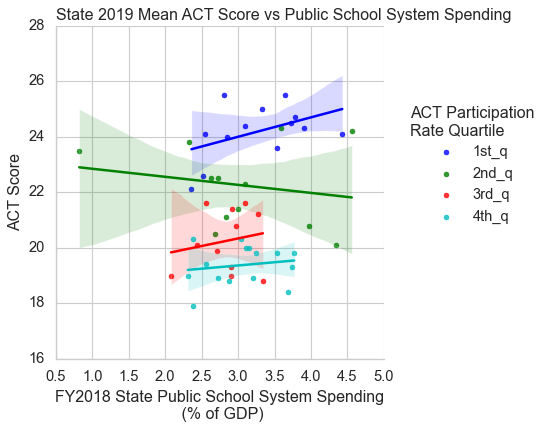

In [440]:
a = sns.lmplot(x='normeduspend', y='act_score', data=score2019, hue='act_participate_q', hue_order=['1st_q', '2nd_q', '3rd_q', '4th_q'], fit_reg=True, legend=False)
a = (a.set_axis_labels('FY2018 State Public School System Spending\n (% of GDP)','ACT Score'))

plt.legend(title='ACT Participation\nRate Quartile', bbox_to_anchor=(1.5,0.8))
plt.title('State 2019 Mean ACT Score vs Public School System Spending', loc='left')
plt.show()
# plt.savefig('actscore_vs_eduspend.png', bbox_inches='tight')

# And mean ACT score shows weak to no correlation with normalised public school spending. 

## Conclusions and Recommendations

#### Conclusions
* The SAT is preferred over the ACT in New York state, similar to other states in the Northeastern Seaboard
* There is a negative correlation between SAT/ACT score and participation rate, likely due to selection bias - in states where the test is not mandatory, students are likely to only take tests if they feel that they can do well in them.
* Taking into account participation rates, New York state fares relatively better than its peers in both mean SAT and ACT score. This could be because it has a high per capita income compared to other states, which appears to have a positive correlation with scores.
* Stripping away the effect of participation rates, state public school system spending appears to have a weak to no effect on scores. Other factors like spending allocation may be more important and warrant further investigation. 

#### Recommendations
* Relative to other states, students in New York state are performing moderately well in its ACT and SAT exams. Existing efforts seem to be adequate and should be continued.
* There is no evidence that increasing public school system spending leads to an increase in test scores. Instead of increasing spending wholesale, we recommend for the Commissioner to examine the allocation of spending and channel monies toward more effective programmes.


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!